In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Arina-Nevolina/from-idea-to-mvp/main/data/clients.csv")
random_state = 42

## Описание данных

### Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.  
_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

**Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно**
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [3]:
df.sample(10)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
103448,103449,Female,59.0,Loyal Customer,Business travel,Business,3136.0,6.0,0.0,2.0,...,4.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,-
79100,79101,Female,26.0,Loyal Customer,Personal Travel,Eco,226.0,0.0,0.0,1.0,...,1.0,3.0,2.0,4.0,5.0,5.0,5.0,5.0,2.0,neutral or dissatisfied
118107,118108,Female,63.0,Loyal Customer,Personal Travel,Eco,1999.0,66.0,49.0,1.0,...,4.0,4.0,2.0,2.0,1.0,2.0,5.0,2.0,5.0,-
48790,48791,Female,37.0,disloyal Customer,Business travel,Business,421.0,3.0,17.0,3.0,...,3.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,4.0,-
33086,33087,Female,40.0,Loyal Customer,Personal Travel,Eco,102.0,0.0,0.0,0.0,...,0.0,1.0,1.0,4.0,4.0,4.0,5.0,5.0,1.0,satisfied
6981,6982,Female,55.0,Loyal Customer,Business travel,Business,3571.0,25.0,18.0,2.0,...,4.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,neutral or dissatisfied
80696,80697,Male,49.0,Loyal Customer,Business travel,Business,3732.0,0.0,0.0,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,-
116098,116099,Male,12.0,Loyal Customer,Personal Travel,Eco,373.0,1.0,0.0,2.0,...,2.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,neutral or dissatisfied
54387,54388,Female,76.0,Loyal Customer,Business travel,Business,1713.0,8.0,2.0,5.0,...,2.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,satisfied
93309,93310,Male,15.0,Loyal Customer,Personal Travel,Eco,1733.0,206.0,215.0,2.0,...,5.0,5.0,1.0,1.0,4.0,3.0,5.0,4.0,5.0,neutral or dissatisfied


In [4]:
df.shape

(129880, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129564.0,40.113951,20.365190,0.0,27.00,40.0,51.00,621.0
Flight Distance,129786.0,1323.385804,4516.191530,0.0,414.00,846.0,1744.00,379620.0
Departure Delay in Minutes,129773.0,15.811301,93.206139,0.0,0.00,0.0,12.00,22227.0
Arrival Delay in Minutes,129371.0,16.651406,109.167328,0.0,0.00,0.0,13.00,14006.0
Inflight wifi service,129835.0,2.732183,1.359786,0.0,2.00,3.0,4.00,45.0
Departure/Arrival time convenient,129831.0,3.061857,1.559323,0.0,2.00,3.0,4.00,45.0
Ease of Online booking,129837.0,2.760523,1.430800,0.0,2.00,3.0,4.00,45.0
Gate location,129842.0,2.981424,1.312628,0.0,2.00,3.0,4.00,36.0
Food and drink,129830.0,3.208349,1.357649,0.0,2.00,3.0,4.00,45.0


- бОльшая часть рейсов **не задерживается** (медианная величина признаков Departure Delay in Minutes и Arrival Delay in Minutes равна 0)
- бОльшая часть клиентов оценивает сервисы на борту самолета на **3 и выше** (медианное значение всех признаков 3 или 4)
- хуже всего пассажиры оценивают **интернет на борту самолета, удобство времени вылета/прилета, удобство онлайн-бронирования, расположение выхода на посадку**
- лучше всего пассажиры оценивают **обращение с багажом, обслуживание на борту, удобство сидений**
- по **всем** показателям есть выбросы

## Работа с пропусками и выбросами

In [7]:
df.isna().sum()

# смотрим внимательнее на пропуски в данных, они есть по всем переменным
# больше всего их по переменным Gender, Age, Arrival Delay in Minutes

id                                     0
Gender                               331
Age                                  316
Customer Type                         77
Type of Travel                       101
Class                                116
Flight Distance                       94
Departure Delay in Minutes           107
Arrival Delay in Minutes             509
Inflight wifi service                 45
Departure/Arrival time convenient     49
Ease of Online booking                43
Gate location                         38
Food and drink                        50
Online boarding                       46
Seat comfort                          48
Inflight entertainment                47
On-board service                      44
Leg room service                      46
Baggage handling                      48
Checkin service                       42
Inflight service                      63
Cleanliness                           37
satisfaction                           0
dtype: int64

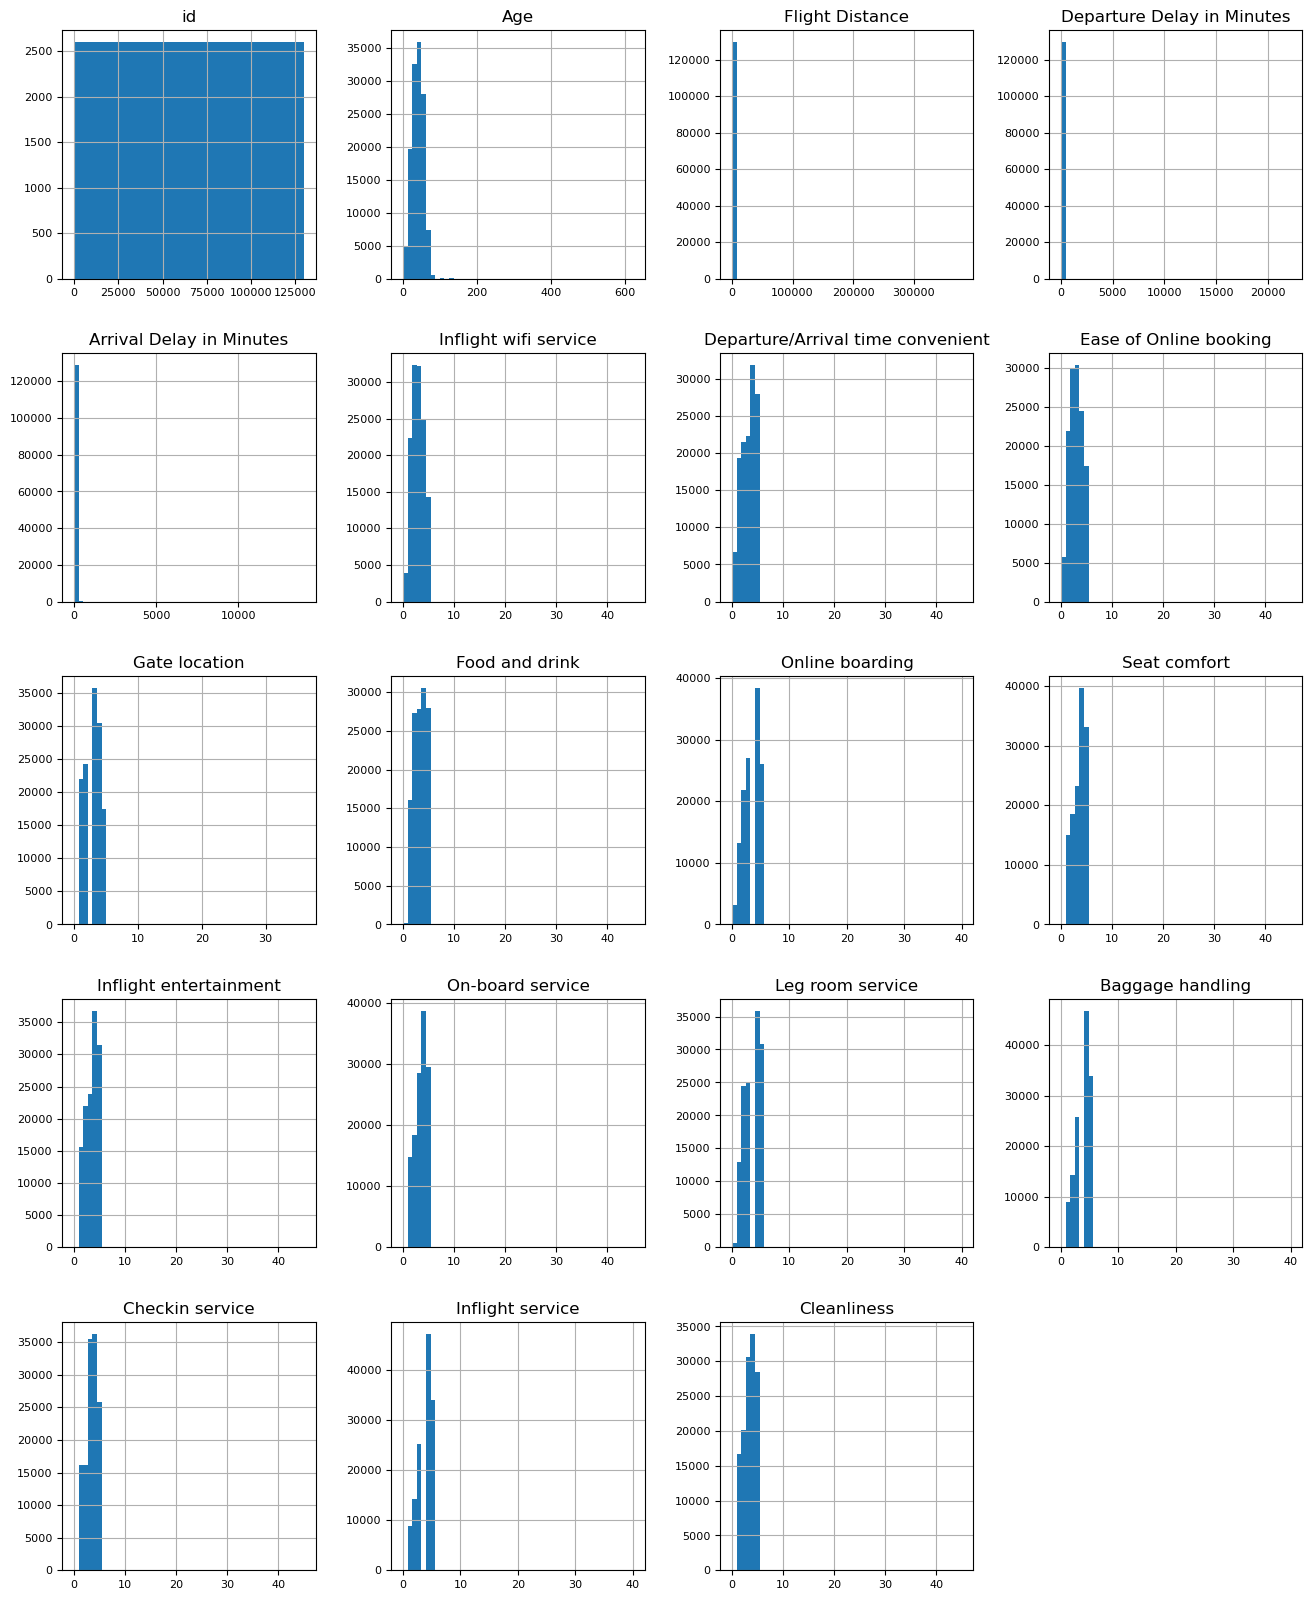

In [8]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# смотрим внимательнее на выбросы. они есть по каждой переменной, сильнее всего - по 
# Flight Distance, Age, Departure Delay in Minutes, Arrival Delay in Minutes

### Категориальные признаки

Видим, что в таргете есть неизвестная категория "-", попробуем понять, относится ли она к одной из существующих категорий - удовлетворенных и неудовлетворенных пассажиров

In [9]:
# Для этого вычисляем средние оценки сервисов для разных групп пассажиров и строим графики распределения среднего для каждой группы

mean__ = df[df['satisfaction']=='-'].iloc[:,9:23].mean(axis = 1) # неизвестно, удовлетворенные ли пассажиры
mean_s = df[df['satisfaction']=='satisfied'].iloc[:,9:23].mean(axis = 1) # удовлетворенные 
mean_u = df[df['satisfaction']=='neutral or dissatisfied'].iloc[:,9:23].mean(axis = 1) # неудовлетворенные 

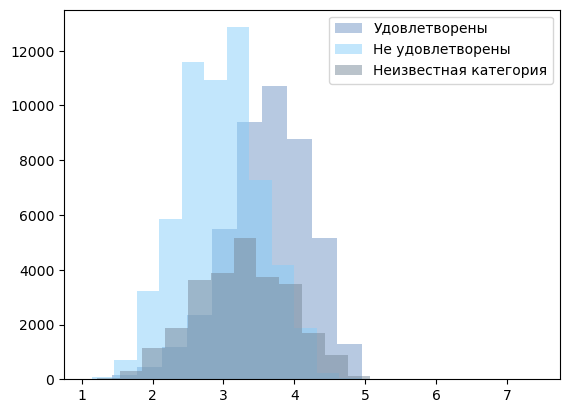

In [10]:
plt.hist(mean_s, alpha=0.9, label='Удовлетворены',color = 'lightsteelblue', bins =18)
plt.hist(mean_u, alpha=0.5, label='Не удовлетворены',color = 'lightskyblue', bins =18)
plt.hist(mean__, alpha=0.5, label='Неизвестная категория',color = 'lightslategray', bins =18)

plt.legend(loc='upper right')
plt.show()

# смотрим на распределение средних и видим, что неизвестная категория
# ведет себя кк нечто среднее между другими двумя
# поэтому ее нельзя отнести к какой-либо из категорий, удалим ее

In [11]:
data_clean = df
data_clean = data_clean.loc[data_clean['satisfaction'] != '-']

# удаляем пропуски в целевой переменной

In [12]:
for i in data_clean.iloc[:, 9:-1]:
    data_clean[i] = np.where((data_clean[i] > 5.0), np.nan, data_clean[i])
    
# для признаков оценки сервиса заменим на NaN значения, выходящие за рамки 
# возможных оценок (0-5) и далее обработаем их как пропуски

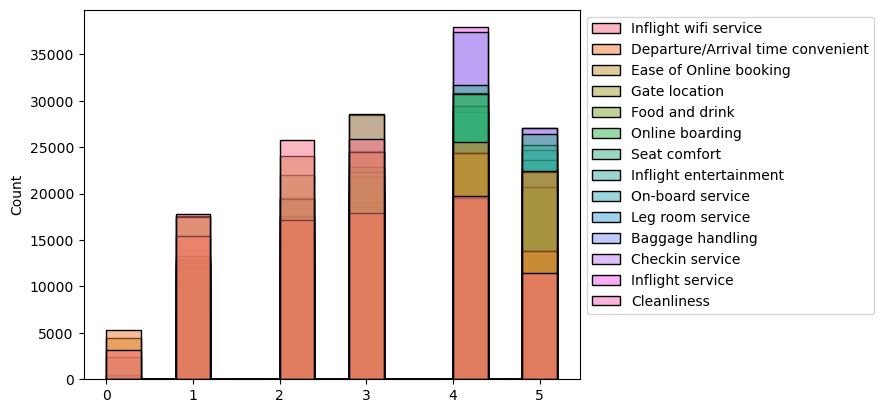

In [13]:
# теперь оценки находятся в нужном диапазоне

h = sns.histplot(data_clean.iloc[:, 9:-1], binwidth=0.4)
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1))

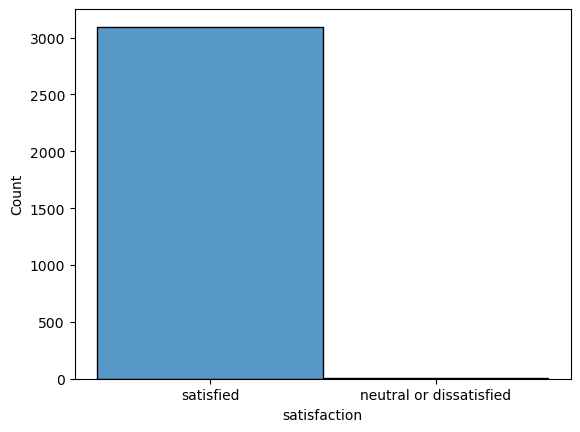

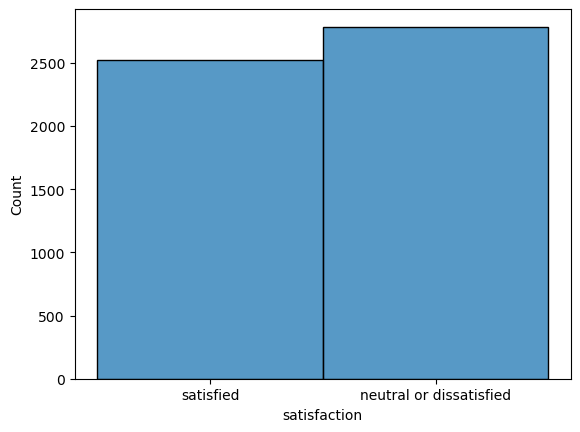

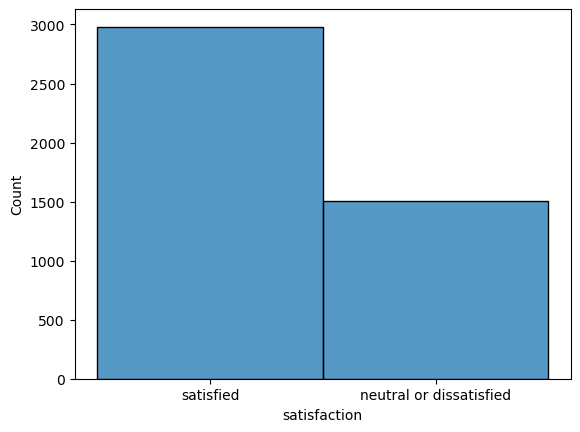

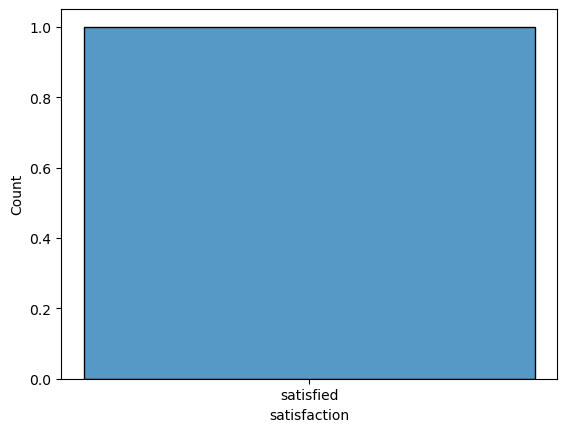

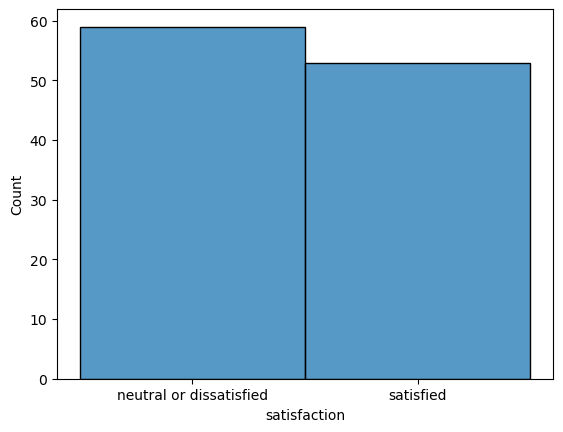

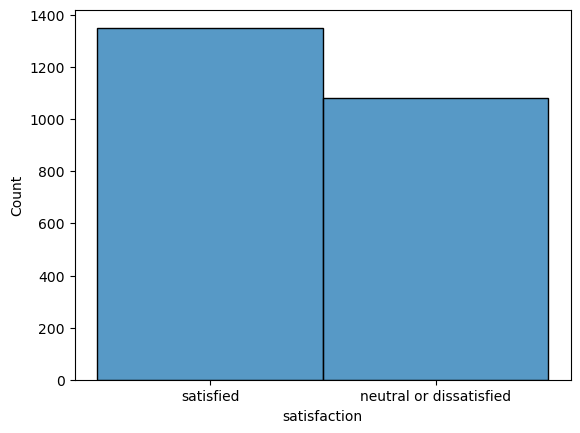

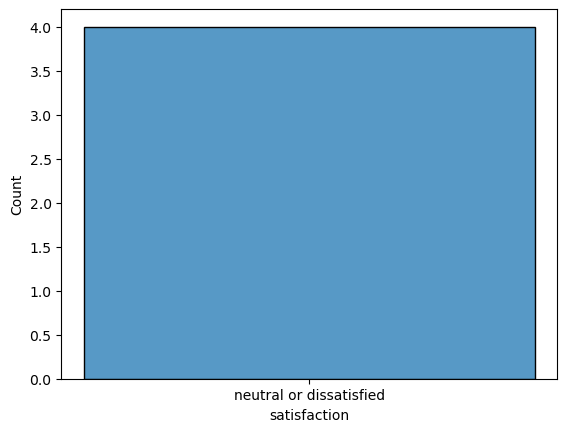

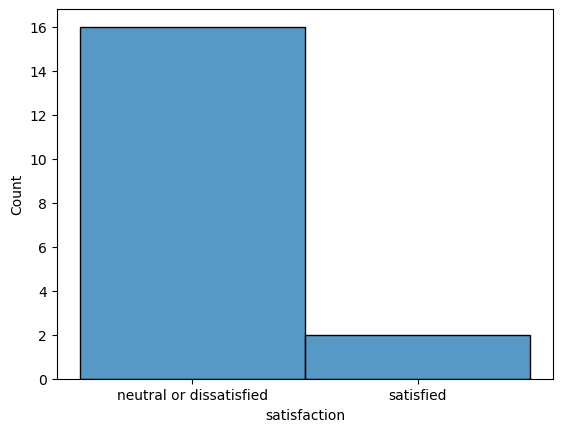

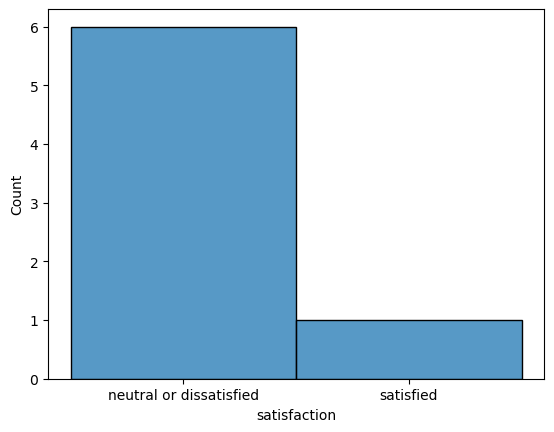

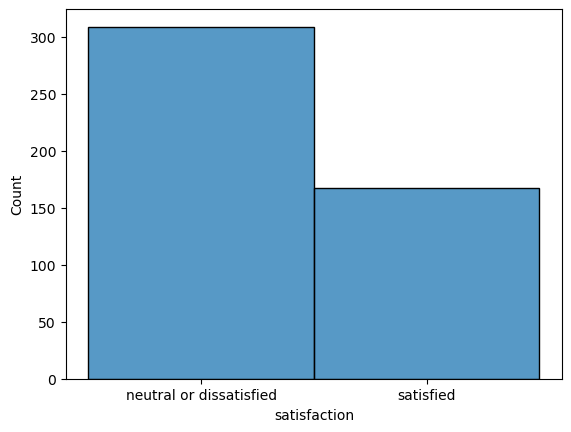

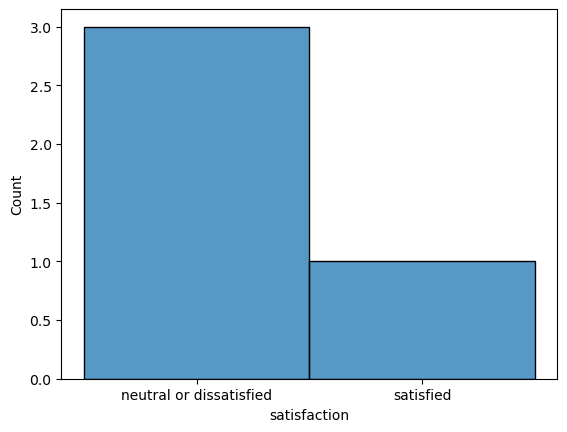

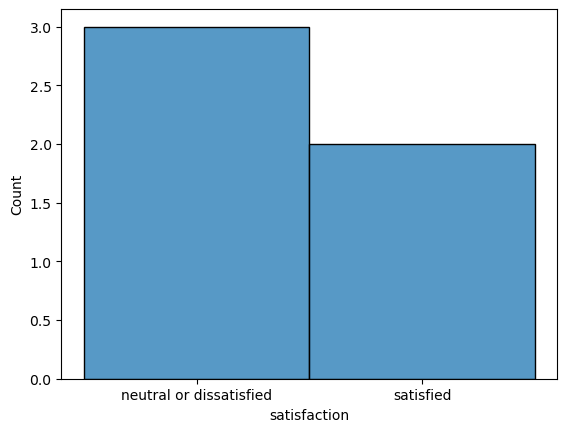

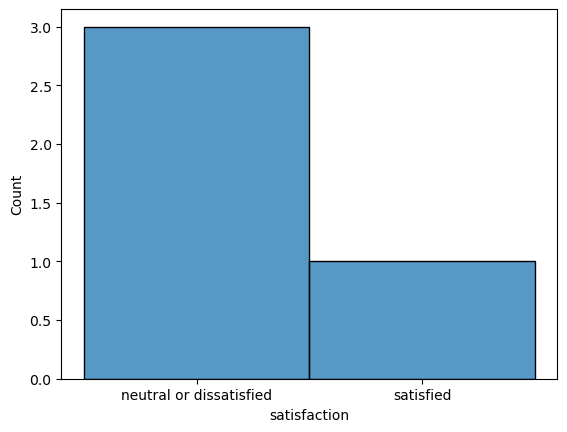

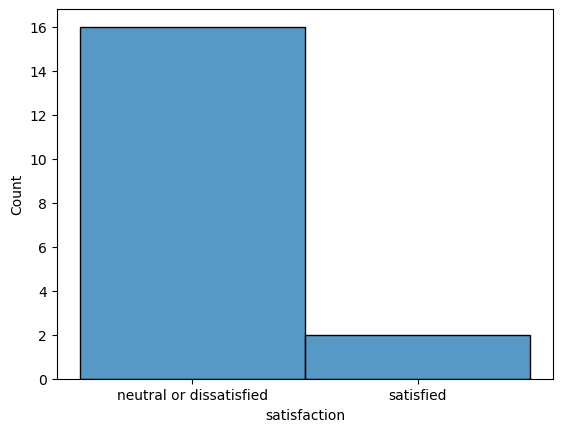

In [14]:
for i in data_clean.iloc[:, 9:-1]:
    sns.histplot(data_clean.loc[data_clean[i] == 0]['satisfaction'])
    plt.show()
    
# оценки 0 можно заменить на 1. видим, что клиенты, 
# поставившие 0 за какой-либо сервис, часто остаются недовольны полетом в целом

In [15]:
for i in data_clean.iloc[:, 9:-1]:
    data_clean[i].replace(0, 1, inplace=True)

In [16]:
for col in data_clean.iloc[:, 9:-1]:
    data_clean[col].fillna(data_clean[col].mode()[0], inplace = True)
    
# для признаков оценки сервиса заменяем пропуски модой

In [17]:
data_clean.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103644,103838,103816,103815,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52590,84873,71596,49615,58879


In [18]:
data_clean['Customer Type'].fillna(data_clean['Customer Type'].mode()[0], inplace = True)
data_clean['Type of Travel'].fillna(data_clean['Type of Travel'].mode()[0], inplace = True)
    
# заменяем пропуски модой для остальных категориальных переменных, 
#кроме Class и Gender, так как для них нет явно доминирующего класса

In [19]:
for i in ['Gender','Class']:
    print(data_clean[i].value_counts(dropna=False))
    
# видим, что пропусков по переменным Class и Gender немного
# можем их просто удалить

Female    52590
Male      51054
NaN         260
Name: Gender, dtype: int64
Business    49615
Eco         46714
Eco Plus     7486
NaN            89
Name: Class, dtype: int64


### Вещественные признаки

In [20]:
data_clean[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103643.000000,103832.000000,103820.000000,103497.000000
mean,40.054389,1326.458394,15.810817,16.774061
std,20.347693,4652.744368,73.904747,109.079850
min,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,612.000000,379620.000000,11011.000000,14006.000000


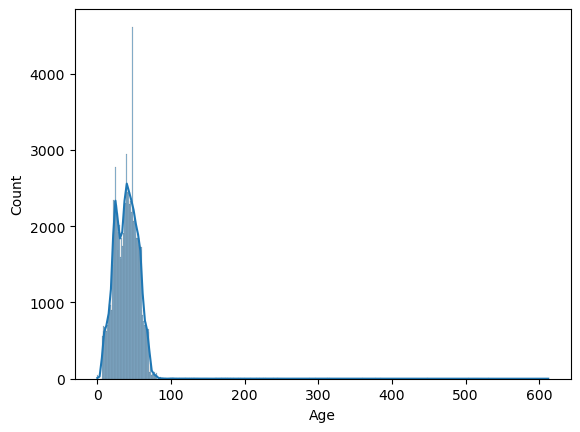

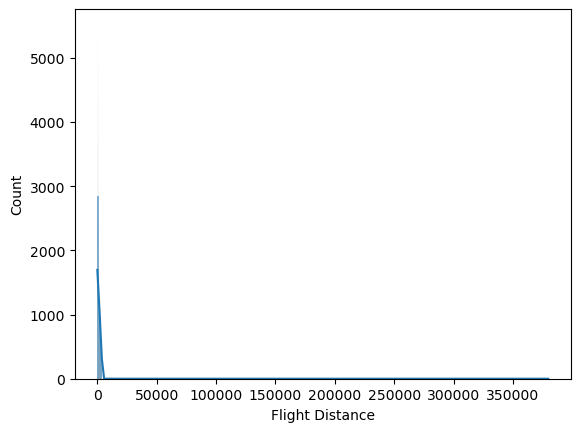

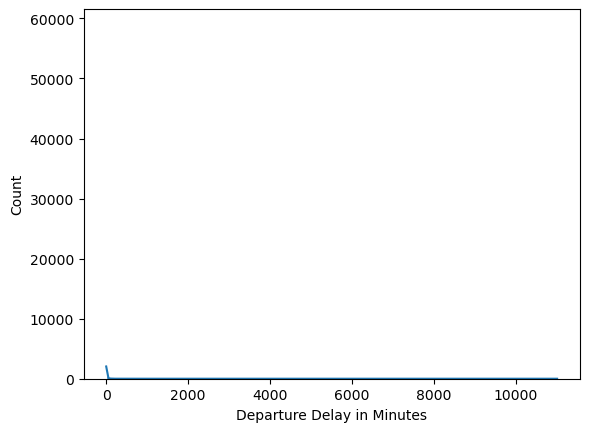

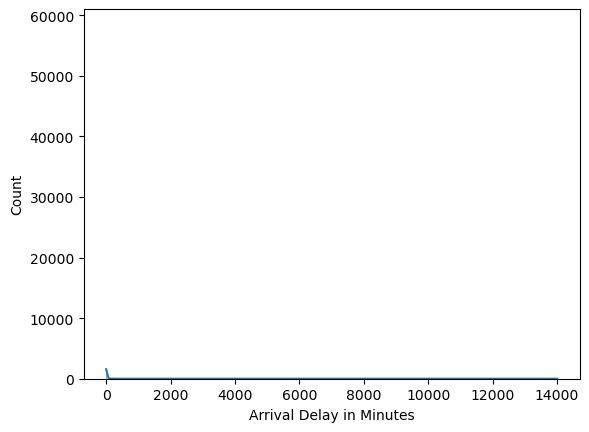

In [21]:
for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    sns.histplot(data_clean[col], kde=True)
    plt.show()

In [22]:
data_clean['Age'] = np.where((data_clean['Age'] > 100), np.nan, data_clean['Age'])
# так как максимальная дистанция полета - около 15000 км
data_clean['Flight Distance'] = np.where((data_clean['Flight Distance']*1.609 > 15000), np.nan, data_clean['Flight Distance'])

In [23]:
for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    col_99_percentile = np.nanpercentile(data_clean[col], 99)
    data_clean[col] = np.where(data_clean[col] > col_99_percentile, np.nan, data_clean[col])

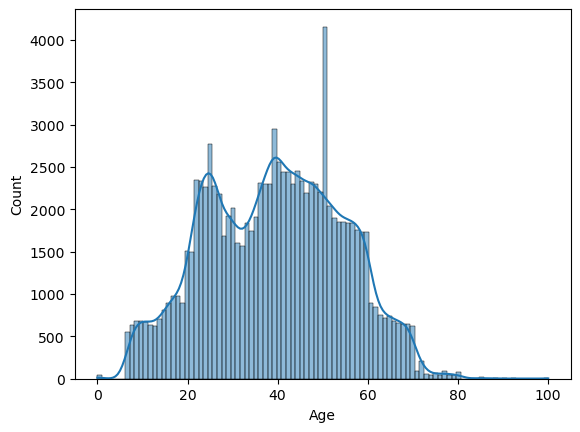

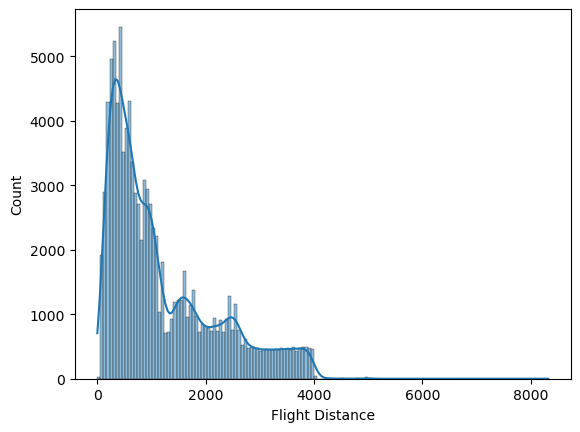

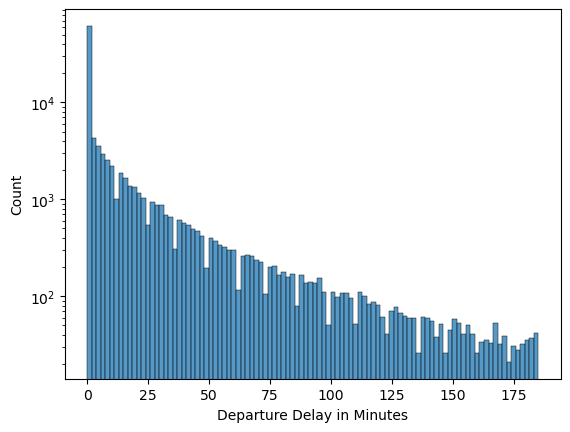

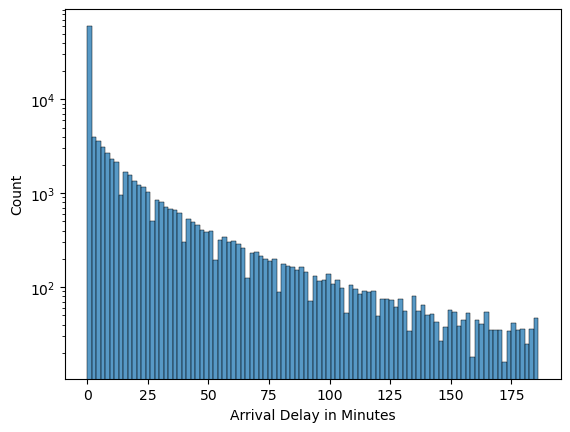

In [24]:
for col in ['Age', 'Flight Distance']:
    sns.histplot(data_clean[col], kde=True)
    plt.show()
    
for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    sns.histplot(data_clean[col], bins=100)
    plt.yscale('log')
    plt.show()

In [25]:
for col in ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    data_clean[col].fillna(data_clean[col].median(), inplace = True)
    
# заменяем пропуски медианными значениями, так как они более устойчивы к выбросам
# несмотря на удаление части выбросов, некоторые наблюдения по задержкам
# все еще принимают слишком большие значения

In [26]:
data_clean.dropna(inplace = True)

# удаляем пропуски (остались в переменных Gender и Class)

In [27]:
data_clean.drop('id', axis=1, inplace=True)

# удаляем столбец id, так как его использование может привести к переобучению

In [28]:
data_clean.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000,103555.000000
mean,39.396292,1189.158148,12.278142,12.527208,2.759847,3.112269,2.800328,2.977539,3.203679,3.274173,3.439766,3.358592,3.382309,3.355743,3.631548,3.304669,3.640491,3.286794
std,15.130437,997.972169,26.715522,26.950670,1.276191,1.435827,1.326356,1.277262,1.326988,1.300421,1.318582,1.332283,1.288218,1.305254,1.180933,1.265389,1.175606,1.311534
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,843.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1739.000000,11.000000,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,100.000000,8326.000000,185.000000,186.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**теперь вещественные признаки находятся в разумных диапазонах:** 
- возраст не более 100 лет, 
- длина полета не более 15000 км,
- задержки в прилете/вылете примерно не более 3 часов

### Кодируем признаки

In [29]:
data_clean['satisfaction'] = data_clean['satisfaction'].replace(['satisfied', 'neutral or dissatisfied'], [1,0])

data_clean['Gender'] = data_clean['Gender'].replace(['Male', 'Female'], [1,0])
data_clean['Customer Type'] = data_clean['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [1,0])
data_clean['Type of Travel'] = data_clean['Type of Travel'].replace(['Business travel', 'Personal Travel'], [1,0])

In [30]:
enc_class = pd.get_dummies(data_clean['Class'], drop_first=True)
data_clean = pd.concat([data_clean, enc_class], axis=1)
data_clean.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Eco,Eco Plus
0,1,48.0,0,1,Business,821.0,2.0,5.0,3.0,3.0,...,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0,0,0
1,0,35.0,1,1,Business,821.0,26.0,39.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1,0,0
2,1,41.0,1,1,Business,853.0,0.0,0.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1,0,0
3,1,50.0,1,1,Business,1905.0,0.0,0.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1,0,0
4,0,49.0,1,1,Business,3470.0,0.0,1.0,3.0,3.0,...,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1,0,0


In [31]:
data_clean.drop(['Class'], axis=1, inplace=True)

In [32]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103555 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103555 non-null  int64  
 1   Age                                103555 non-null  float64
 2   Customer Type                      103555 non-null  int64  
 3   Type of Travel                     103555 non-null  int64  
 4   Flight Distance                    103555 non-null  float64
 5   Departure Delay in Minutes         103555 non-null  float64
 6   Arrival Delay in Minutes           103555 non-null  float64
 7   Inflight wifi service              103555 non-null  float64
 8   Departure/Arrival time convenient  103555 non-null  float64
 9   Ease of Online booking             103555 non-null  float64
 10  Gate location                      103555 non-null  float64
 11  Food and drink                     1035

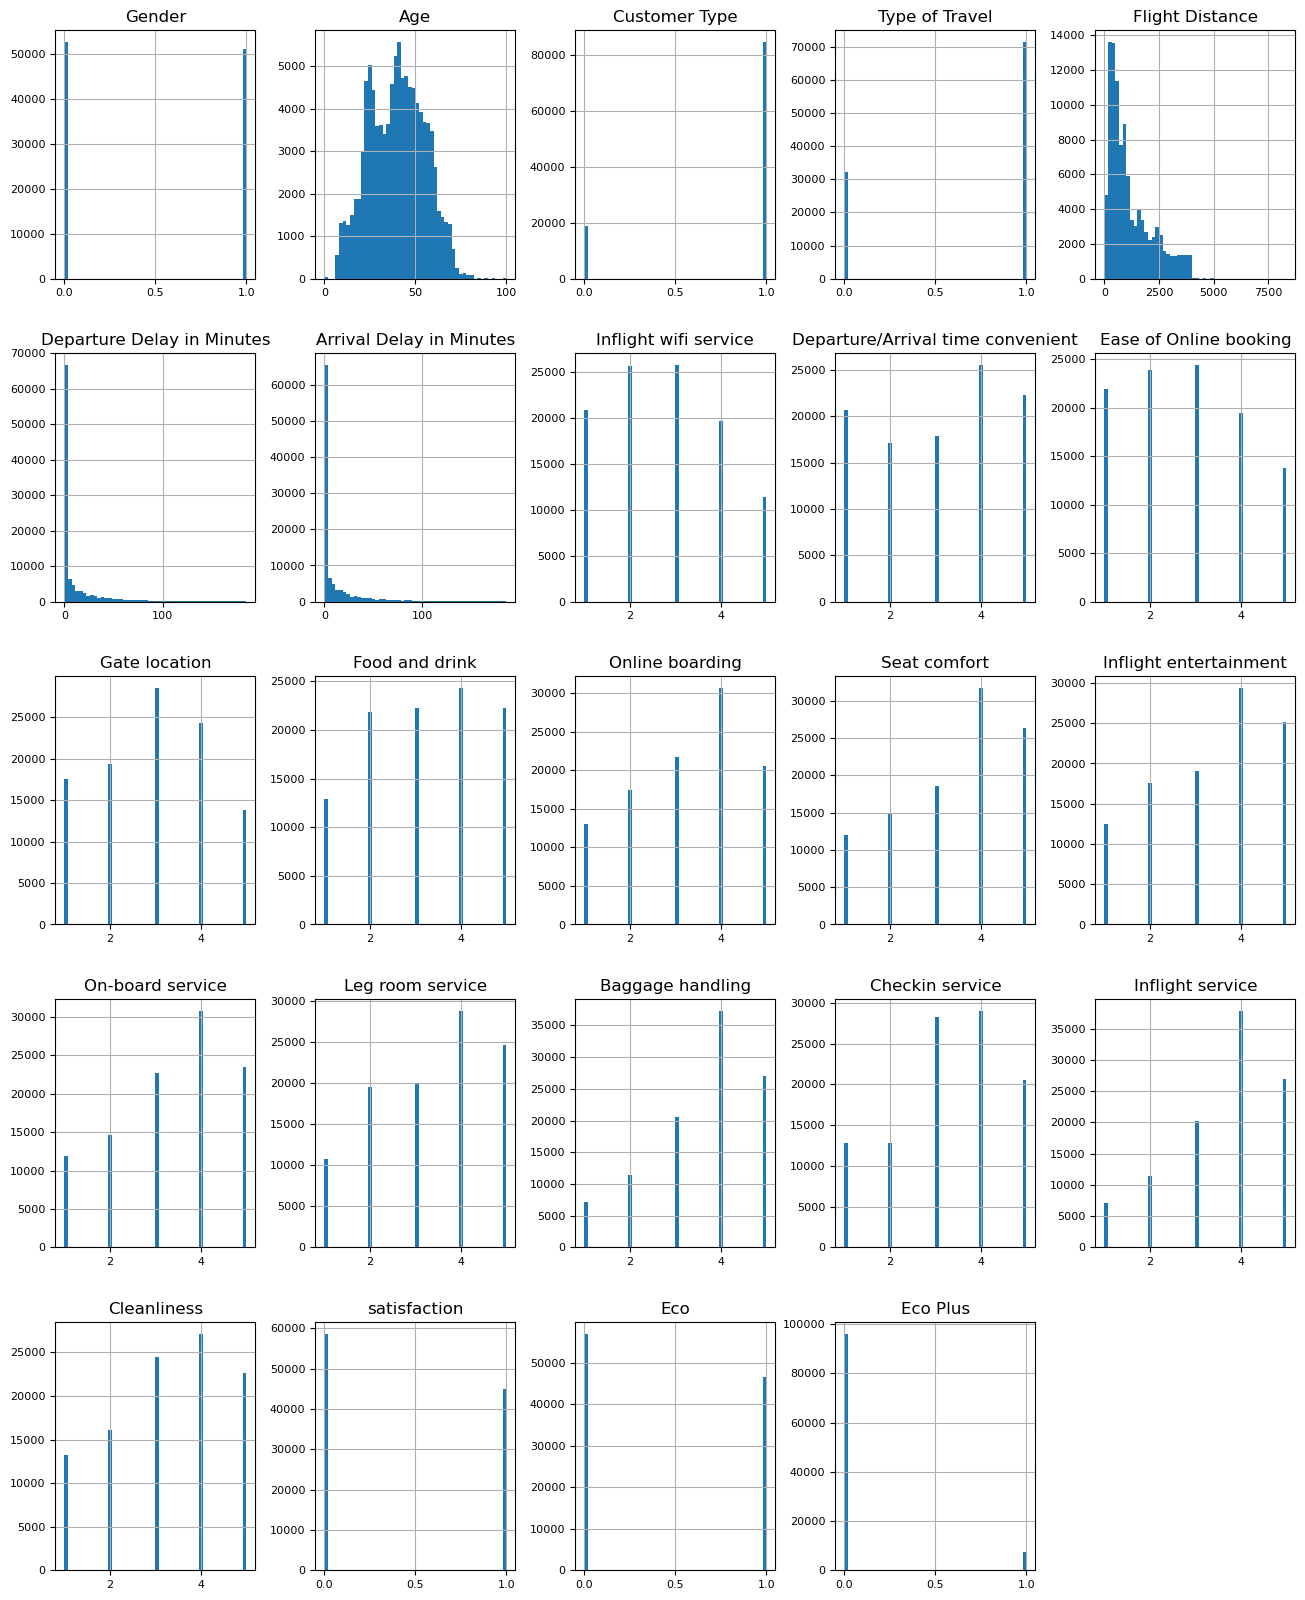

In [33]:
data_clean.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Масштабирование признаков

In [34]:
y = data_clean['satisfaction']
x = data_clean.drop('satisfaction', axis=1)

In [35]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

In [36]:
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Eco,Eco Plus
0,1.0,0.48,0.0,1.0,0.098607,0.010811,0.026882,0.50,0.50,0.50,...,1.00,1.00,0.50,0.25,1.00,0.75,1.00,1.00,0.0,0.0
1,0.0,0.35,1.0,1.0,0.098607,0.140541,0.209677,0.25,0.25,0.25,...,0.75,1.00,1.00,1.00,1.00,0.50,1.00,1.00,0.0,0.0
2,1.0,0.41,1.0,1.0,0.102450,0.000000,0.000000,0.75,0.75,0.75,...,1.00,0.50,0.50,0.50,0.50,0.75,0.50,1.00,0.0,0.0
3,1.0,0.50,1.0,1.0,0.228801,0.000000,0.000000,0.25,0.25,0.25,...,1.00,1.00,1.00,1.00,1.00,0.50,1.00,0.75,0.0,0.0
4,0.0,0.49,1.0,1.0,0.416767,0.000000,0.005376,0.50,0.50,0.50,...,0.75,0.50,0.50,0.75,0.50,0.50,0.50,1.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103550,0.0,0.28,1.0,0.0,0.040476,0.000000,0.000000,0.75,0.25,0.75,...,0.50,0.50,0.00,1.00,0.50,0.75,0.75,0.50,0.0,1.0
103551,0.0,0.55,1.0,0.0,0.036993,0.000000,0.000000,0.50,0.75,0.50,...,0.50,0.75,0.75,0.50,0.75,0.75,0.75,0.75,0.0,1.0
103552,1.0,0.42,1.0,0.0,0.040476,0.032432,0.075269,0.25,1.00,0.25,...,0.50,0.50,0.50,0.75,1.00,0.75,0.75,0.50,0.0,1.0
103553,1.0,0.50,1.0,0.0,0.040476,0.167568,0.118280,1.00,0.75,0.75,...,0.75,0.50,0.75,1.00,1.00,0.50,0.75,0.50,0.0,1.0


## Корреляция

<Axes: >

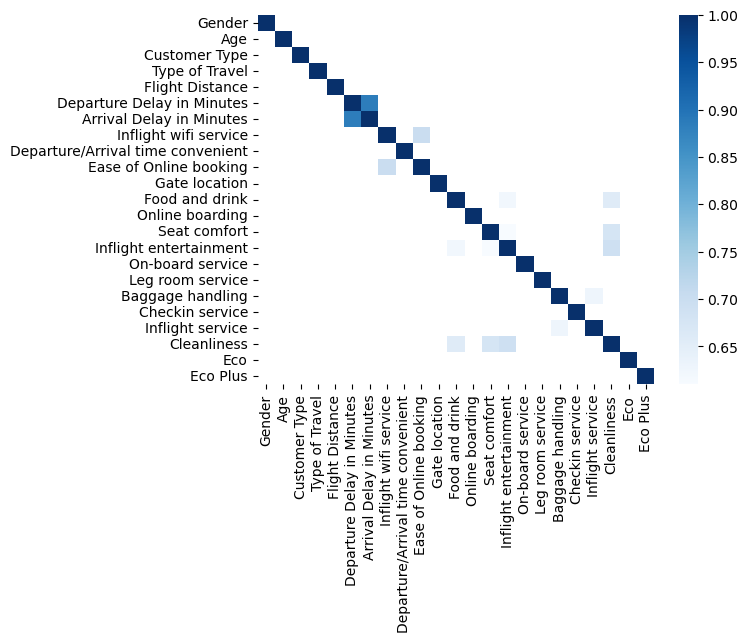

In [37]:
corr = X.corr()
corr = corr[(corr >=.6) | (corr <=-.6)]
sns.heatmap(corr, cmap='Blues')

**Видим, что есть сильно коррелирующие признаки, которые могут привести к мультиколлинеарности:**

- _Arrival Delay in Minutes_ и _Departure Delay in Minutes_
- _Ease of Online booking_ и _Inflight wifi service_
- _Food and drink_, _Seat comfort_, _Cleanliness_ и _Inflight entertainment_
- _Baggage handling_ и _Inflight service_

In [38]:
X.drop(columns=['Arrival Delay in Minutes', 'Inflight wifi service', 'Food and drink',
                'Seat comfort', 'Inflight entertainment', 'Baggage handling'], inplace=True)

# Выбираем из каждой группы признаков один
# и оставляем только его в данных

## Графический анализ взаимосвязей

In [39]:
categorial_cols = data_clean.iloc[:, 7:-3].columns.values.tolist()
categorial_cols += ['Gender', 'Customer Type', 'Type of Travel']
categorial_cols

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Gender',
 'Customer Type',
 'Type of Travel']

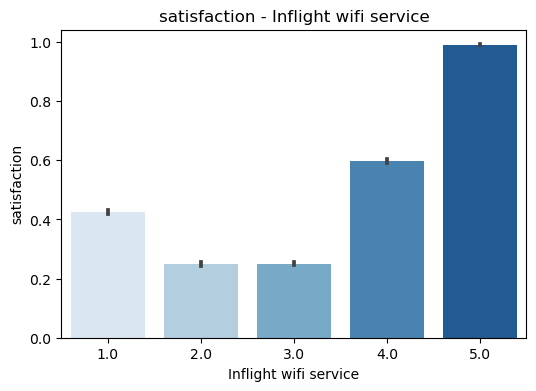

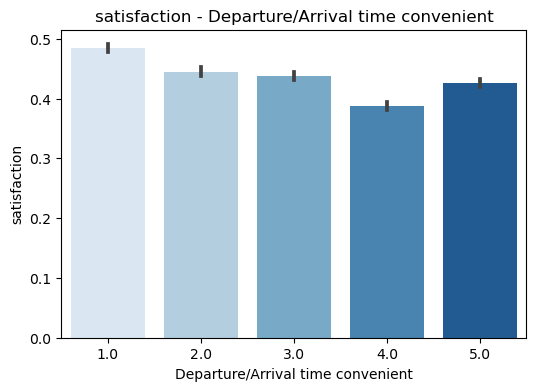

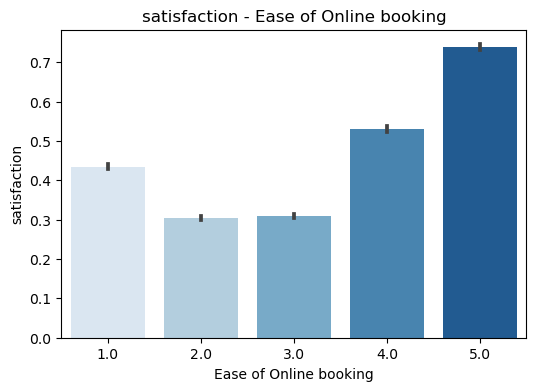

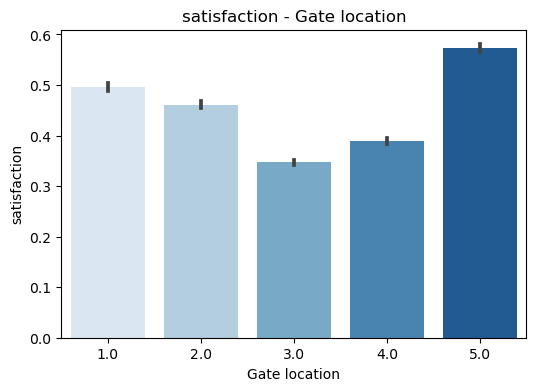

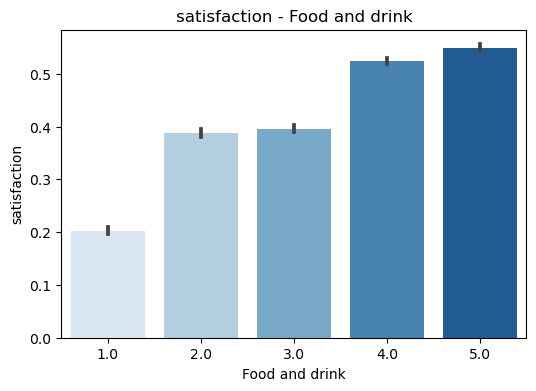

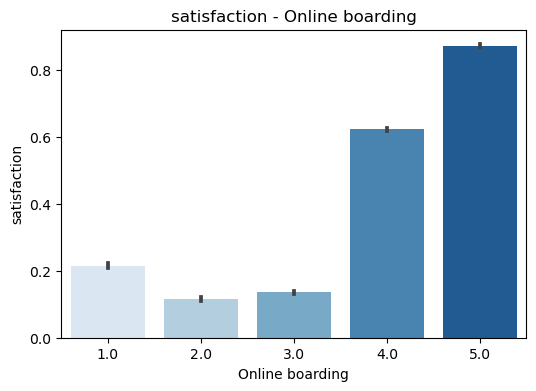

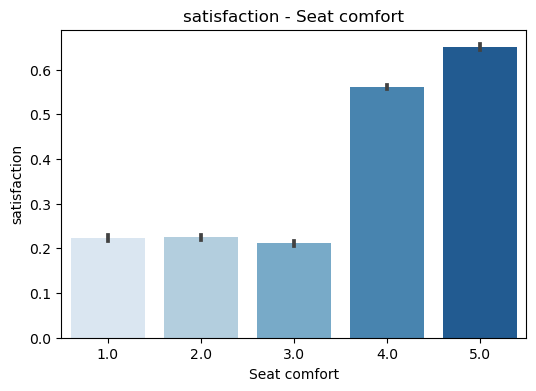

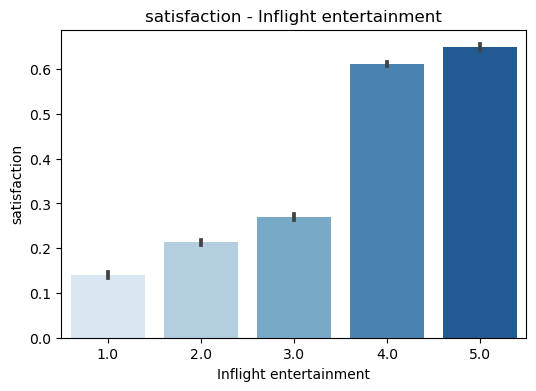

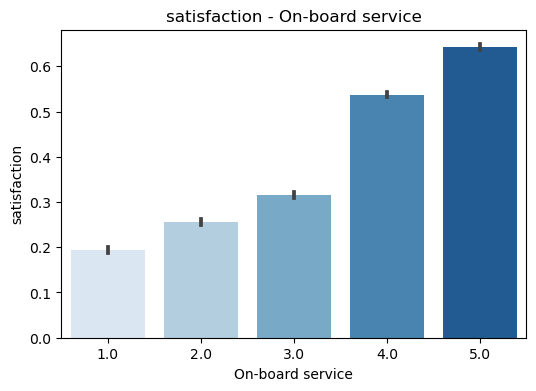

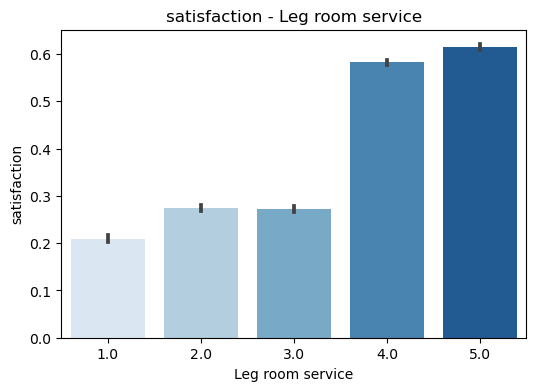

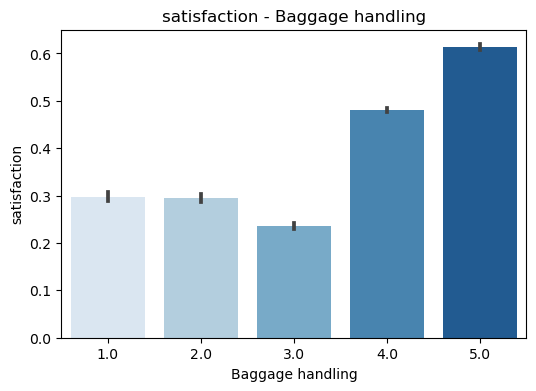

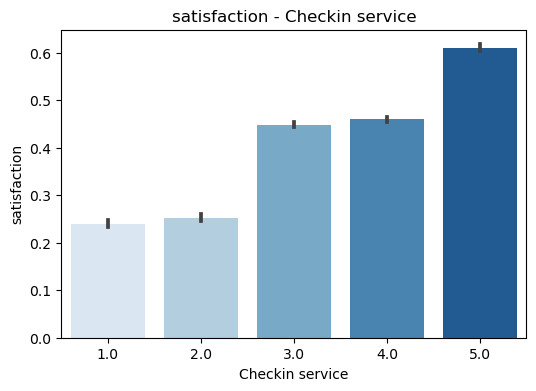

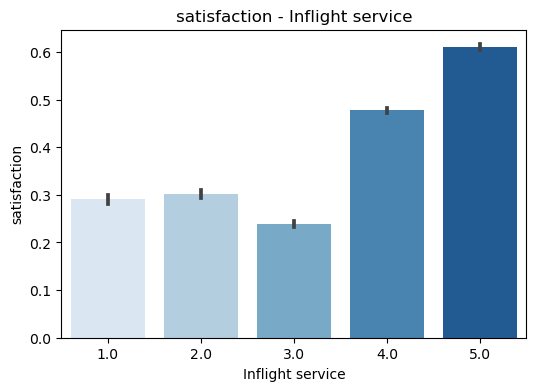

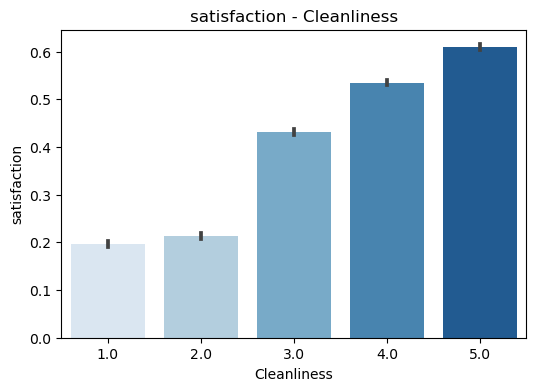

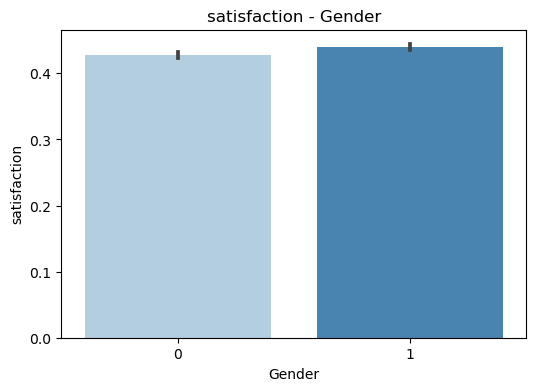

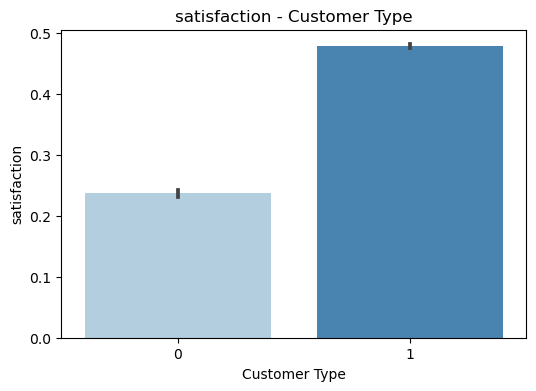

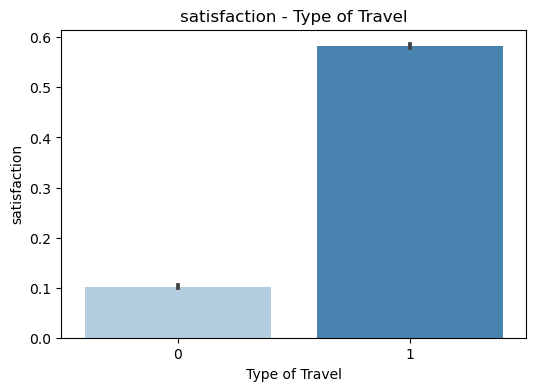

In [40]:
for col in categorial_cols:
    plt.figure(figsize=(6,4))
    
    sns.barplot(x = col, y = 'satisfaction', data = data_clean, palette='Blues')
    plt.title('satisfaction - {}'.format(col))
    plt.show()

**По графикам можно предположить, что значимыми для моделей будут признаки:**
- по этим переменным видно явное преобладание высоких оценок для довольных клиентов
    - type of travel
    - customer type _(однако распределение для этой переменной очень похоже с type of travel, может быть высокая корреляция)_
    - online boarding 
    - seat comfort _(распределение для этой переменной очень похоже с online boarding , может быть высокая корреляция)_
- в той или иной мере видно положительную линейную взаимосвязь
    - cleanliness
    - on-board service _(распределение для этой переменной очень похоже с cleanliness, может быть высокая корреляция)_
    - leg room service
    - inflight entartainment _(распределение для этой переменной очень похоже с leg room service, может быть высокая корреляция)_

**Незначимыми, скорее всего, будут:**
- gender _(так как одинаковое количество людей муж. и жен. пола)_
- depatrure/arrival time convinient _(так как примерно равное количество оценок каждого типа)_
- gate location _(так как много довольных перелетом пассажиров ставит как 1, так и 5, график больше похож на параболу, в данном кейсе это не сходится с логикой переменной, по идее связь должна быть ближе к линейной положительной)_
- food and drink _(довольные клиенты почти одинаково часто ставят любые оценки от 2 до 5)_

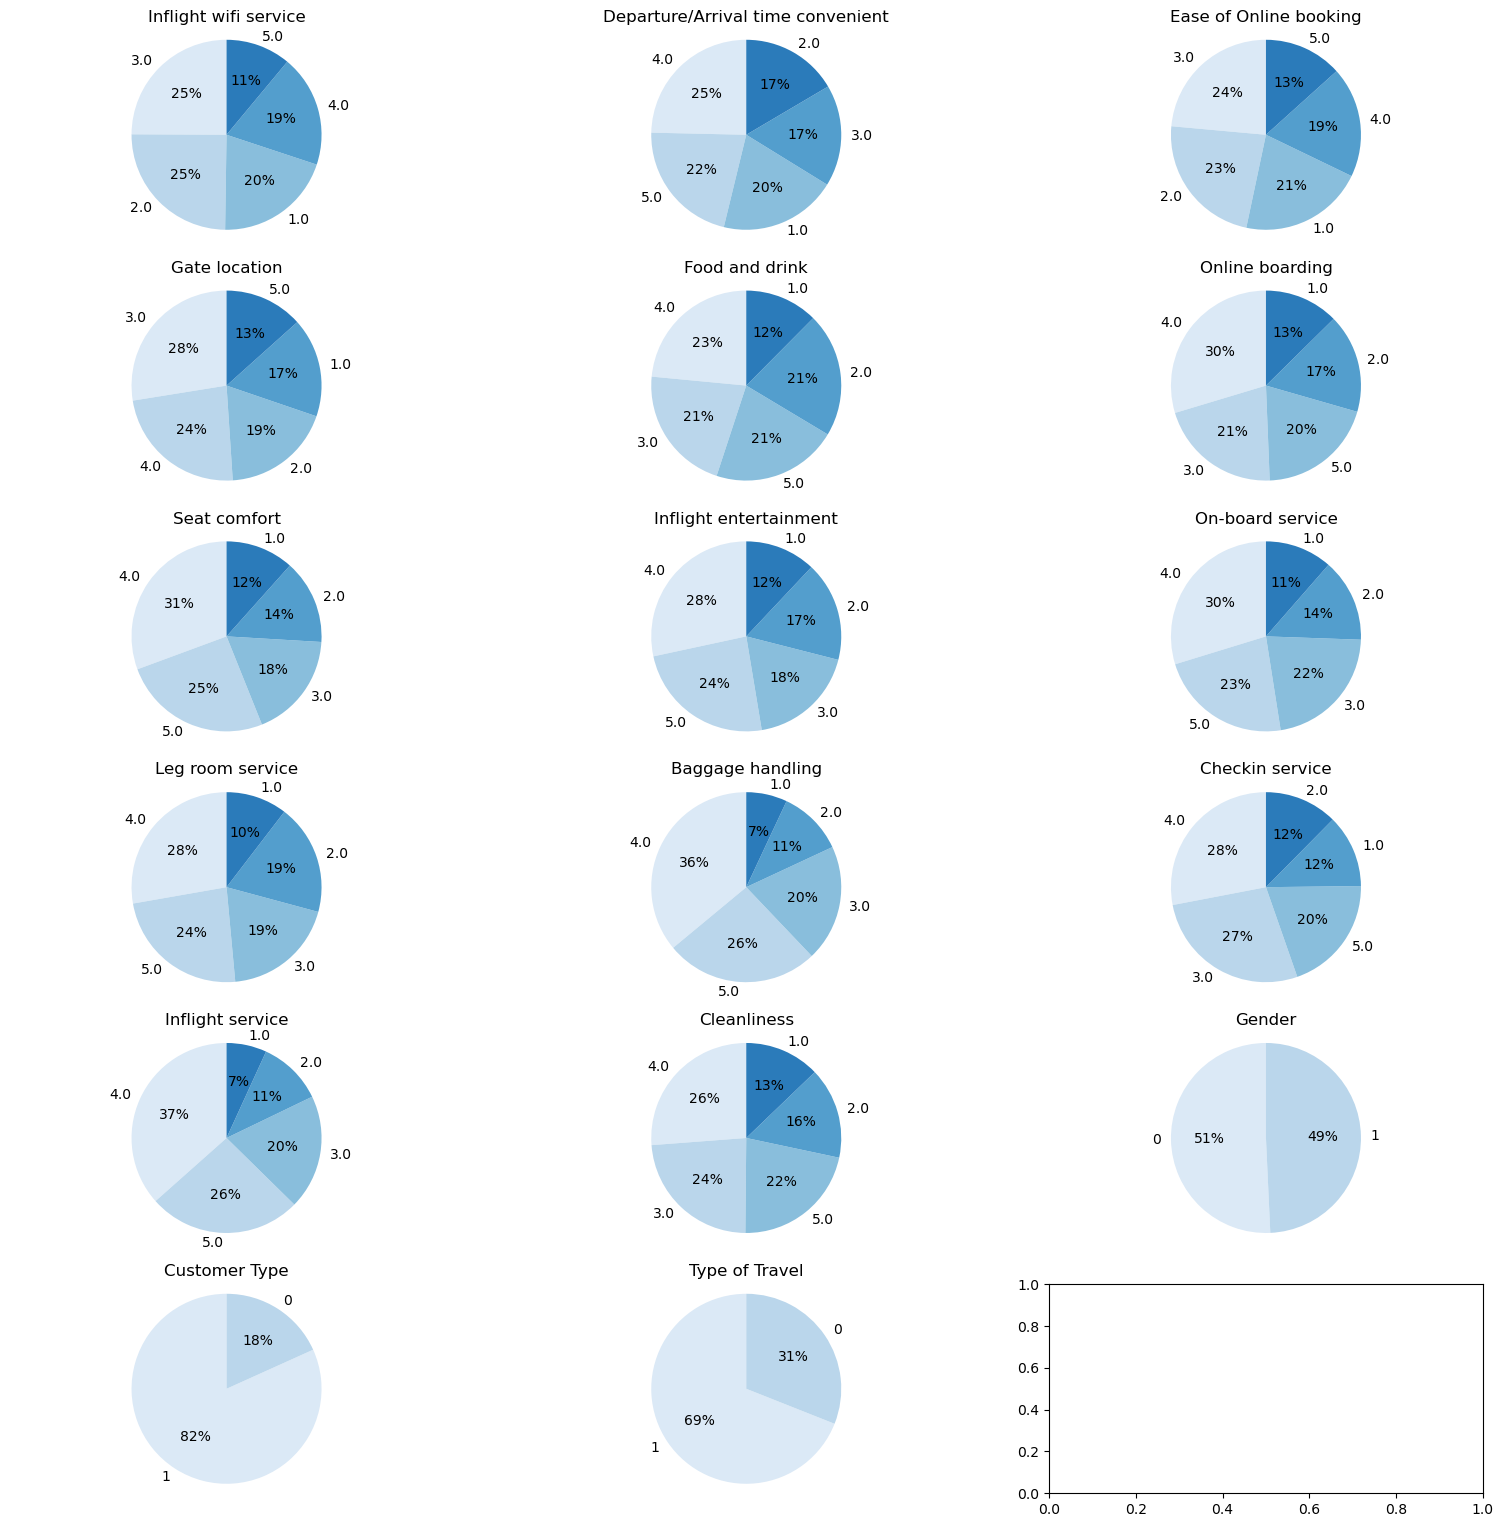

In [277]:
# аналогичные графики в более компактном виде + более наглядно видно доли на графиках в виде пирога

colors = sns.color_palette('Blues')

fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categorial_cols):
    column_values = data_clean[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, autopct = '%1.0f%%', startangle = 90, colors = colors)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

## Построение моделей

**Выбираем целевую метрику**
- так как авиакомпании важнее выявлять недовольных перелетом клиентов (то есть допустимо ошибиться и указать довольного клиента как недовольного), то **в качестве целевой метрики выбран recall**
- также посмотрим и на другие связанные с этой метрики - precision, f1-score, AUC ROC, чтобы по возможности минимизировать ошибки
- на accuracy также посмотрим, так как данные сбалансированы

**Сначала посмотрим на результаты моделей без подбора гиперпараметров, далее уже для лучшей модели подберем гиперпараметры**

In [89]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Логистическая регрессия

In [53]:
lr = LogisticRegression(random_state=42) 

lr.fit(X_train, y_train)

lr_ypred_train = lr.predict(X_train)
lr_ypred_test = lr.predict(X_test)

In [139]:
for score, name in zip([accuracy_score, f1_score, precision_score, recall_score, roc_auc_score], 
                       ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score']):
    print(name, '\n', 'train:', round(score(y_train,lr_ypred_train),4), '\n', 'test: ', round(score(y_test,lr_ypred_test),4))

accuracy 
 train: 0.8677 
 test:  0.8739
f1_score 
 train: 0.844 
 test:  0.8507
precision 
 train: 0.8643 
 test:  0.8695
recall 
 train: 0.8247 
 test:  0.8327
roc_auc_score 
 train: 0.8627 
 test:  0.8689


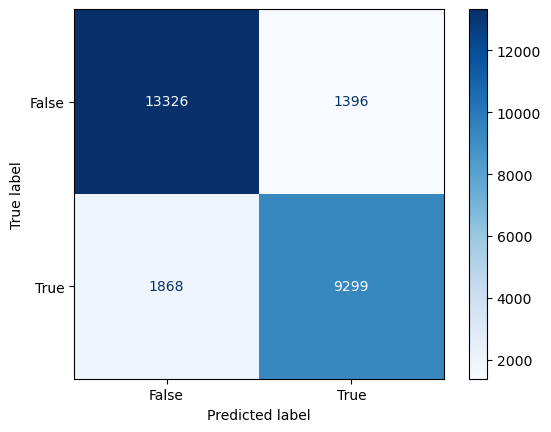

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, lr_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

### Decision Tree

In [59]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)

tree_ypred_train = tree.predict(X_train)
tree_ypred_test = tree.predict(X_test)

In [143]:
for score, name in zip([accuracy_score, f1_score, precision_score, recall_score, roc_auc_score], 
                       ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score']):
    print(name, '\n', 'train:', round(score(y_train,tree_ypred_train),5), '\n', 'test: ', round(score(y_test,tree_ypred_test),5))

accuracy 
 train: 1.0 
 test:  0.88431
f1_score 
 train: 1.0 
 test:  0.8672
precision 
 train: 1.0 
 test:  0.85886
recall 
 train: 1.0 
 test:  0.87571
roc_auc_score 
 train: 1.0 
 test:  0.88327


Видим, что дерево решений переобучилось

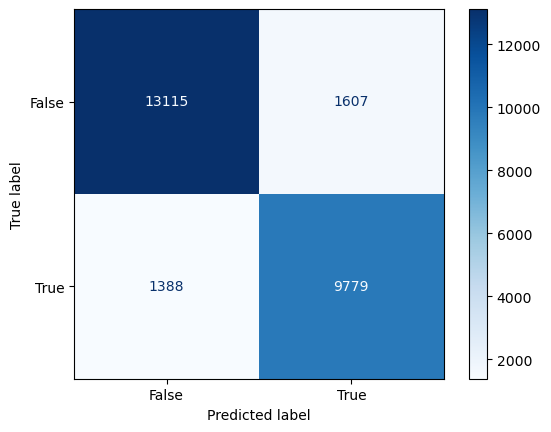

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, tree_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

### Random Forest

In [65]:
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

forest_ypred_train = forest.predict(X_train)
forest_ypred_test = forest.predict(X_test)

In [142]:
for score, name in zip([accuracy_score, f1_score, precision_score, recall_score, roc_auc_score], 
                       ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score']):
    print(name, '\n', 'train:', round(score(y_train,forest_ypred_train),5), '\n', 'test: ', round(score(y_test,forest_ypred_test),5))

accuracy 
 train: 0.99996 
 test:  0.92506
f1_score 
 train: 0.99996 
 test:  0.91068
precision 
 train: 1.0 
 test:  0.93717
recall 
 train: 0.99991 
 test:  0.88565
roc_auc_score 
 train: 0.99996 
 test:  0.92031


Случайный лес тоже переобучился, но меньше. Можно поработать с гиперпараметрами, чтобы снизить переобучение

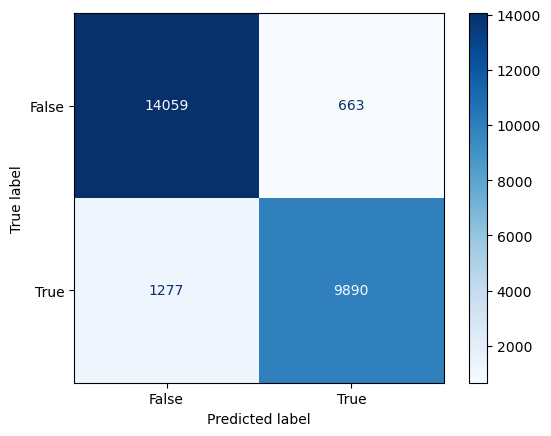

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, forest_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

### KNN

In [71]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn_ypred_train = knn.predict(X_train)
knn_ypred_test = knn.predict(X_test)

In [144]:
for score, name in zip([accuracy_score, f1_score, precision_score, recall_score, roc_auc_score], 
                       ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score']):
    print(name, '\n', 'train:', round(score(y_train,knn_ypred_train),5), '\n', 'test: ', round(score(y_test,knn_ypred_test),5))

accuracy 
 train: 0.92519 
 test:  0.90212
f1_score 
 train: 0.91107 
 test:  0.88259
precision 
 train: 0.94097 
 test:  0.91445
recall 
 train: 0.88301 
 test:  0.85287
roc_auc_score 
 train: 0.92027 
 test:  0.89617


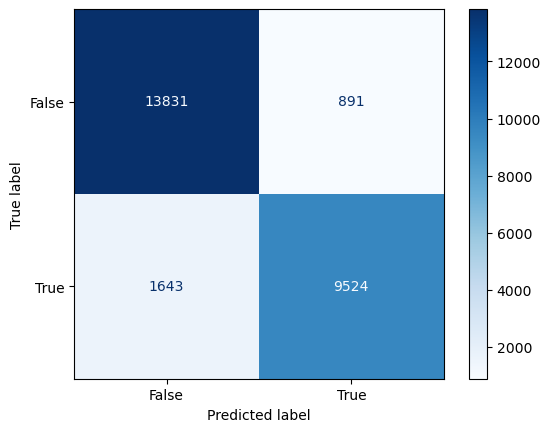

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, knn_ypred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap = 'Blues')
plt.show()

## Сравнение метрик качества для всех моделей

In [78]:
precisions, recalls, f1scores, accuracys, rocaucs = [], [], [], [], []

def data(score):
    cv_log_best = cross_validate(lr, X, y, cv = 5, scoring = score)
    cv_knn_best = cross_validate(knn, X, y, cv = 5, scoring = score)
    cv_tree_best = cross_validate(tree, X, y, cv = 5, scoring = score)
    cv_forest_best = cross_validate(forest, X, y, cv = 5, scoring = score)
    return [cv_log_best['test_score'], cv_knn_best['test_score'], cv_tree_best['test_score'], 
            cv_forest_best['test_score']]

def average(data, frame):
    for i in data:
        average = 0
        for j in i:
            average += j
        average = average / 5
        frame.append(average)
    return frame

average(data('precision'), precisions)
average(data('recall'), recalls)
average(data('roc_auc'), rocaucs)
average(data('f1'), f1scores)
average(data('accuracy'), accuracys)

[0.8652020665346918, 0.8943749698227995, 0.8827289845975569, 0.918304282748298]

In [79]:
model = ['lr', 'knn', 'tree', 'forest']
metrics_cv = pd.DataFrame({'f1_score': f1scores, 'precision': precisions, 'recall': recalls, 'ROC AUC': rocaucs, 
                        'accuracy': accuracys}, index=model)
metrics_cv

,f1_score,precision,recall,ROC AUC,accuracy
lr,0.838205,0.865259,0.816899,0.926350,0.865202
knn,0.871256,0.913216,0.836310,0.942968,0.894375
tree,0.864341,0.862741,0.867265,0.880909,0.882729
forest,0.901755,0.934152,0.873483,0.971977,0.918304


## Вывод:  
видим, что модель случайного леса позволяет получить результаты более высокого качества по сравнению с остальными моделями. однако она может переобучаться. подберем для нее гиперпараметры с помощью optuna

In [150]:
import optuna
from optuna import Trial

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 150, 251)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    max_depth = trial.suggest_int('max_depth', 5, 31)
    min_samples_split = trial.suggest_int('min_samples_split', 4, 33)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 4, 17)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    
    classifier = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion,
                                        max_depth = max_depth, min_samples_split = min_samples_split, 
                                        min_samples_leaf = min_samples_leaf, max_features = max_features,
                                        random_state = 42)
    
    score = cross_val_score(classifier, X, y, cv=5, scoring="recall")
    
    recall = score.mean()
    
    return recall

In [278]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-08-13 18:40:45,482] A new study created in memory with name: no-name-b85fd7ca-3222-47a7-871d-ff7536c15b50
[I 2023-08-13 18:41:13,937] Trial 0 finished with value: 0.8586849288535807 and parameters: {'n_estimators': 151, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8586849288535807.
[I 2023-08-13 18:42:11,487] Trial 1 finished with value: 0.867822072182529 and parameters: {'n_estimators': 246, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 28, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.867822072182529.
[I 2023-08-13 18:43:02,678] Trial 2 finished with value: 0.8754438827612793 and parameters: {'n_estimators': 182, 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 21, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 2 with value: 0.8754438827612793.
[I 2023-08-13 18:43:53,779] Trial 3 finished with value: 0.87125

[I 2023-08-13 19:05:34,970] Trial 30 finished with value: 0.8476087614296455 and parameters: {'n_estimators': 204, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 13, 'min_samples_leaf': 14, 'max_features': 'log2'}. Best is trial 24 with value: 0.8762238965802167.
[I 2023-08-13 19:06:18,916] Trial 31 finished with value: 0.8750427685551514 and parameters: {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 24 with value: 0.8762238965802167.
[I 2023-08-13 19:07:11,427] Trial 32 finished with value: 0.8762685194554619 and parameters: {'n_estimators': 179, 'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 32 with value: 0.8762685194554619.
[I 2023-08-13 19:08:04,763] Trial 33 finished with value: 0.8764467626377161 and parameters: {'n_estimators': 190, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 

[I 2023-08-13 19:35:04,827] Trial 60 finished with value: 0.8744856282432754 and parameters: {'n_estimators': 199, 'criterion': 'gini', 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 19:35:59,535] Trial 61 finished with value: 0.8766696113129046 and parameters: {'n_estimators': 194, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 19:36:57,755] Trial 62 finished with value: 0.87664734705584 and parameters: {'n_estimators': 210, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 19:37:51,958] Trial 63 finished with value: 0.8763799251691516 and parameters: {'n_estimators': 195, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 10, 

[I 2023-08-13 20:05:27,157] Trial 90 finished with value: 0.8758004634869041 and parameters: {'n_estimators': 229, 'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 20:06:25,802] Trial 91 finished with value: 0.8772044948172777 and parameters: {'n_estimators': 207, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 20:07:24,728] Trial 92 finished with value: 0.8761793208855293 and parameters: {'n_estimators': 207, 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 47 with value: 0.8776279378433394.
[I 2023-08-13 20:08:21,785] Trial 93 finished with value: 0.875911916381152 and parameters: {'n_estimators': 204, 'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 13

### Сохраняем модель для использования в интерактивном приложении

In [279]:
model = RandomForestClassifier(n_estimators = study.best_params['n_estimators'],
                               criterion = study.best_params['criterion'],
                               max_depth = study.best_params['max_depth'], 
                               min_samples_split = study.best_params['min_samples_split'], 
                               min_samples_leaf = study.best_params['min_samples_leaf'], 
                               max_features = study.best_params['max_features'],
                               random_state = 42)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features='log2', min_samples_leaf=4,
                       min_samples_split=9, n_estimators=208, random_state=42)

In [280]:
model_ypred_train = model.predict(X_train)
model_ypred_test = model.predict(X_test)

In [281]:
for score, name in zip([accuracy_score, f1_score, precision_score, recall_score, roc_auc_score], 
                       ['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc_score']):
    print(name, '\n', 'train:', round(score(y_train,model_ypred_train),4), '\n', 'test: ', round(score(y_test,model_ypred_test),4))

accuracy 
 train: 0.945 
 test:  0.9254
f1_score 
 train: 0.9352 
 test:  0.9115
precision 
 train: 0.9567 
 test:  0.9326
recall 
 train: 0.9147 
 test:  0.8915
roc_auc_score 
 train: 0.9415 
 test:  0.9213


In [282]:
def plot_feature_importance(df, model):
    # создаем датафрейм с названиями признаков и их значимостью
    feature_importance = model.feature_importances_
    feature_names = df.columns
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    importances_df = pd.DataFrame(data)
    
    # сортируем датафрейм по значимости признаков
    importances_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    # строим график
    plt.figure(figsize=(10,8))
    
    sns.barplot(x=importances_df['feature_importance'], y=importances_df['feature_names'])
    
    plt.title('Random Forest Feature Importances')
    plt.xlabel('feature importance')
    plt.ylabel('feature name')

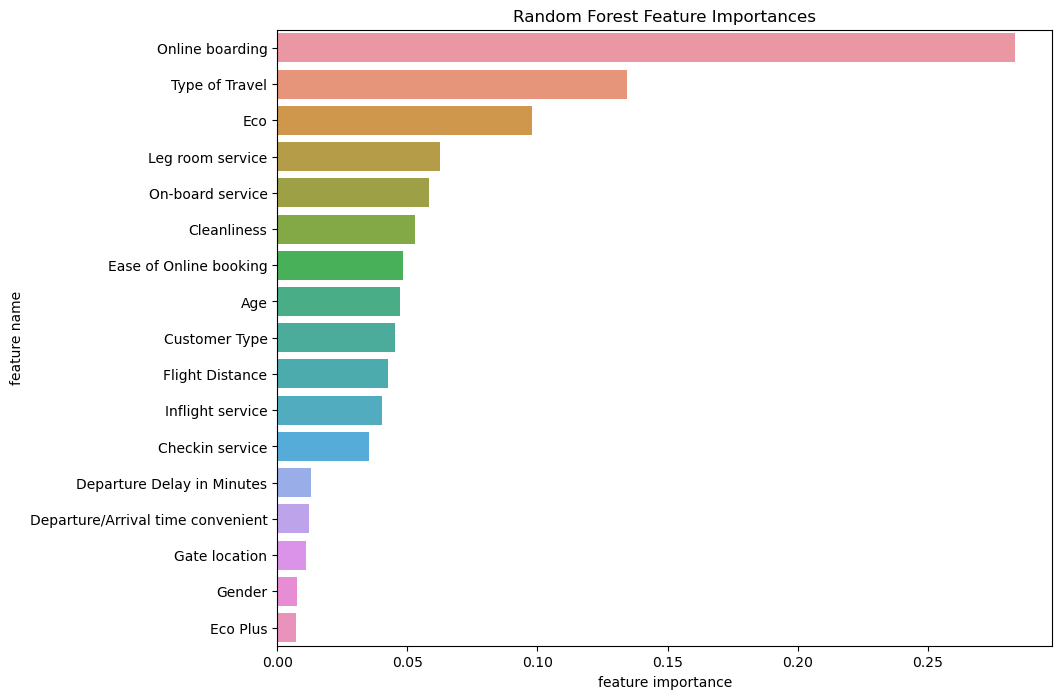

In [283]:
plot_feature_importance(X_train, model)

In [284]:
# поэскпериментируем с порогом вероятности принадлежности к классу "1"
probs = model.predict_proba(X_test)
metrics = pd.DataFrame()

for threshold in np.arange(0.4, 0.51, 0.01):
    classes = probs[:,1] > threshold
    classes = pd.DataFrame(classes)
    
    row = {'threshold': threshold}
    
    for name, metric, in zip(['recall', 'precision', 'f1_score', 'auc_roc'], 
                             [recall_score, precision_score, f1_score, roc_auc_score]):
        row[name] = metric(np.array(y_test), classes[0])
    metrics = metrics.append(row, ignore_index=True)

In [285]:
metrics

,threshold,recall,precision,f1_score,auc_roc
0,0.40,0.911615,0.909416,0.910514,0.921369
1,0.41,0.909824,0.911538,0.910680,0.921424
2,0.42,0.908301,0.913866,0.911075,0.921682
3,0.43,0.906600,0.916199,0.911374,0.921850
4,0.44,0.905257,0.918165,0.911665,0.922028
5,0.45,0.903286,0.920263,0.911696,0.921960
6,0.46,0.901675,0.921985,0.911717,0.921901
7,0.47,0.898630,0.924629,0.911444,0.921533
8,0.48,0.896481,0.927116,0.911541,0.921512
9,0.49,0.893705,0.929669,0.911332,0.921210


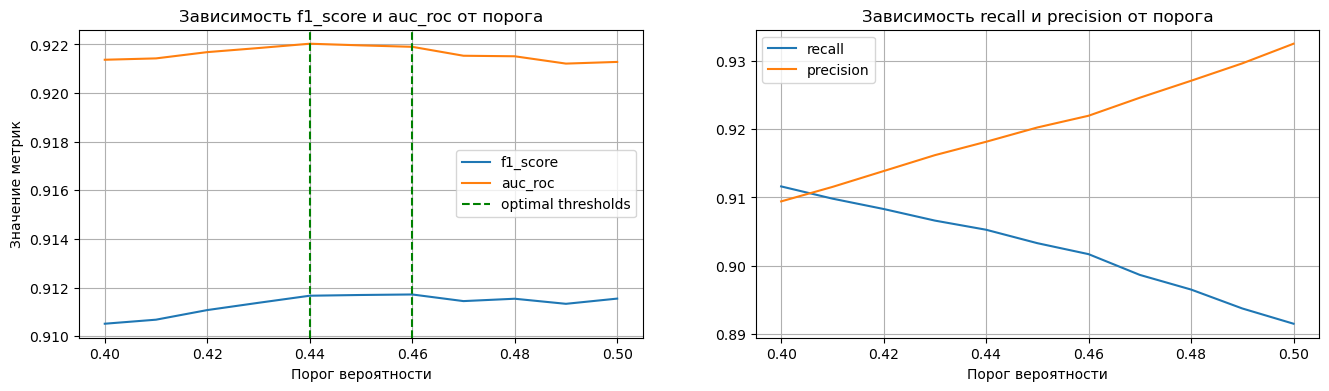

In [289]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(metrics['threshold'], metrics['f1_score'], label='f1_score')
plt.plot(metrics['threshold'], metrics['auc_roc'], label='auc_roc')
plt.axvline(x=0.46, linestyle='--', color='green', label='optimal thresholds')
plt.axvline(x=0.44, linestyle='--', color='green')

plt.xlabel('Порог вероятности')
plt.ylabel('Значение метрик')

plt.legend()
plt.title('Зависимость f1_score и auc_roc от порога')
plt.grid(True)

plt.subplot (1, 2, 2)
plt.plot(metrics['threshold'], metrics['recall'], label='recall')
plt.plot(metrics['threshold'], metrics['precision'], label='precision')

plt.xlabel('Порог вероятности')

plt.legend()
plt.title('Зависимость recall и precision от порога')
plt.grid(True)


plt.show()

- Recall возрастает при уменьшении порога, precision, наоборот, убывает. Будем жертвовать величиной precision для увеличения recall
- Оптимальное значение порога выберем исходя из других метрик: по приведенным графикам видим, что величина f1_score достигает максимума при пороге 0.46, а и auc_roc - при пороге 0.44.
- **Выберем порог 0.46 как оптимальный**, так как разница в значениях roc_auc при порогах 0.44 и 0.46 невелика. При этом выбор именно этого значения позволяет не так сильно жертвовать величиной precision

In [291]:
import pickle

with open('/Users/arinanevolina/PycharmProjects/streamlit_apps/random_forest.pkl', "wb") as file:
    pickle.dump(model, file)